<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroLine%26Poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from shapely.geometry import Point, LineString, Polygon

# ***Line***

In [3]:
point1 = Point(2.2, 4.2)
type(point1)

shapely.geometry.point.Point

In [4]:
point3D = Point(9.26, -2.456, 0.57)
print(point3D)

POINT Z (9.26 -2.456 0.57)


In [5]:
point_coords = point1.coords
point_coords

In [6]:
x=point1.x
y=point1.y
xy = point_coords.xy
print(x)
print(y)
print(xy)

2.2
4.2
(array('d', [2.2]), array('d', [4.2]))


In [7]:
point2 = Point(7.2, -25.1)
point_dist = point1.distance(point2)
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


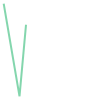

In [8]:
point3 = Point(9.26, -2.456)
# Create a LineString from Point objects
line = LineString([point1, point2, point3])
line

In [9]:
lxy = line.xy
lxy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [10]:
line_x = lxy[0]
line_y = line.xy[1]
print(line_x)
print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


In [11]:
l_length = line.length
l_centroid = line.centroid
print(l_length)
print(l_centroid)

52.46106912939557
POINT (6.229961354035622 -11.892411157572392)


# ***Polygon***

In [12]:
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

world_ex = Polygon(shell=exterior)
world_has_a_hole = Polygon(shell=exterior, holes=hole)
print(world_ex)
print(world_has_a_hole)
print(type(world_has_a_hole))

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
<class 'shapely.geometry.polygon.Polygon'>


In [13]:
world_centroid = world_ex.centroid
world_area = world_ex.area
world_bbox = world_ex.bounds
world_ext = world_ex.exterior
world_ext_length = world_ext.length
print(f'Poly centroid: {world_centroid}')
print(f'Poly Area: {world_area}')
print(f'Poly Bounding Box: {world_bbox}')
print(f'Poly Exterior: {world_ext}')
print(f'Poly Exterior Length: {world_ext_length}')

Poly centroid: POINT (0 0)
Poly Area: 64800.0
Poly Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Poly Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length: 1080.0


In [14]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

multi_point = MultiPoint([point1, point2, point3])

line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

multi_poly = MultiPolygon([west_poly, east_poly_box])

print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


In [15]:
!wget 'https://github.com/AutoGIS-2017/Exercise-1/blob/master/data/travelTimes_2015_Helsinki.txt'

--2022-03-12 11:27:37--  https://github.com/AutoGIS-2017/Exercise-1/blob/master/data/travelTimes_2015_Helsinki.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘travelTimes_2015_Helsinki.txt.3’

travelTimes_2015_He     [ <=>                ] 122.06K  --.-KB/s    in 0.01s   

2022-03-12 11:27:37 (11.2 MB/s) - ‘travelTimes_2015_Helsinki.txt.3’ saved [124994]



In [16]:
example1 = "/content/travelTimes_2015_Helsinki.txt"
file1 = open(example1, "r")
file1.name

'/content/travelTimes_2015_Helsinki.txt'

In [17]:
import requests

result = requests.get('https://github.com/AutoGIS-2017/Exercise-1/blob/master/data/travelTimes_2015_Helsinki.txt')
text = result.text

In [18]:
word_list = text.split(" ")
len(word_list)

12662

In [19]:
import pandas as pd

websites = pd.read_csv('https://raw.githubusercontent.com/AutoGIS-2017/Exercise-1/master/data/travelTimes_2015_Helsinki.txt' ,delimiter = ';')

websites.to_csv("/content/travelTimes_2015_Helsinki.csv",  index = None)

In [20]:
websites.tail()

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines
14638,5861326,5967091,5861326_5967091,1,08:06,24.970438,60.311917,24.559702,60.174754,94.0,72.0,40702.8,2.0
14639,5861326,5967092,5861326_5967092,1,08:06,24.970438,60.311917,24.564204,60.174837,97.0,75.0,40915.0,2.0
14640,5861326,5968733,5861326_5968733,1,08:06,24.970438,60.311917,24.555367,60.172428,89.0,66.0,40305.9,2.0
14641,5861326,5968734,5861326_5968734,1,08:06,24.970438,60.311917,24.559868,60.172511,93.0,71.0,40628.0,2.0
14642,5861326,5970374,5861326_5970374,1,08:06,24.970438,60.311917,24.555534,60.170185,89.0,67.0,40359.2,2.0


In [21]:
import numpy as np

In [35]:
round(websites['to_x'].values[0],2)

24.86

In [55]:
websites['from_x'].nunique()

1

In [86]:
orig_points = []
ox = round(websites['from_x'].mean(),2)
oy = round(websites['from_y'].mean(),2)
orig_points.append((ox,oy))

orig_points

[(24.97, 60.31)]

In [87]:
dest_points = []

for i in range(len(websites['to_x'])):
  dx = round(websites['to_x'].values[i],2)
  dy = round(websites['to_y'].values[i],2)
  
  dest_points.append((dx,dy))
dest_points[0]

(24.86, 60.4)

In [88]:
print(len(dest_points))

14643


In [89]:
O_point = Point(orig_points)
Dmulti_point = MultiPoint(dest_points)

In [90]:
type(O_point)

shapely.geometry.point.Point

In [91]:
type(Dmulti_point)

shapely.geometry.multipoint.MultiPoint

In [92]:
line_D = LineString(dest_points)

In [93]:
Dlp_length = line_D.length
Dlp_centroid = line_D.centroid
print(Dlp_length)
print(Dlp_centroid)

213.29733058851735
POINT (24.85699870110937 60.27485568546407)


In [94]:
Dlp_centroid.x

24.85699870110937

In [49]:
import plotly.express as px

In [95]:
fix = px.scatter_mapbox(websites, lat='to_y', lon='to_x', center={'lat':Dlp_centroid.y, 'lon':Dlp_centroid.x},
                        hover_data=['route_time'])
fix.update_layout(mapbox_style ='open-street-map')
fix.show()

In [98]:
point_dist = O_point.distance(Point(dest_points[0]))
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 0.14 decimal degrees


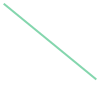

In [113]:
line_dist = LineString([O_point, Point(dest_points[0])])
line_dist

In [116]:
line_dist.centroid.x

24.915

In [117]:
line_dist.length

0.1421267040355162

In [110]:
len(dest_points) == len(websites['from_x'])

True

In [120]:
line_dists = []
for l in range(len(dest_points)):
  line_dist = LineString([O_point, Point(dest_points[l])])
  line_dists.append(line_dist.length)

In [150]:
length = pd.DataFrame({'length':line_dists,
                      'Des X':websites['to_x'],
                      'Des Y':websites['to_y']})

In [152]:
length.head()

,length,Des X,Des Y
0,0.142127,24.856034,60.399941
1,0.142127,24.860568,60.400014
2,0.134536,24.865102,60.400086
3,0.134536,24.869636,60.400159
4,0.158114,24.842582,60.397478


In [153]:
length['length'].mean()

0.21443081571305897

In [154]:
length.describe()

,length,Des X,Des Y
count,14643.000000,14643.000000,14643.000000
mean,0.214431,24.851692,60.263283
std,0.117815,0.199089,0.063512
min,0.000000,24.480485,60.105476
25%,0.122066,24.685565,60.213878
50%,0.190000,24.845547,60.264803
75%,0.302655,25.023525,60.312816
max,0.500100,25.274518,60.409131
